# Simulation du jeux de LIDO simplifié

## Principe
On considére un jeux de Lido simple:
on dispose d'un un seul pion.

- Etape 0 :
Le pion doit sort de sa prison lorsqu'on obtient un 6.

- Etape 1 :
Le pion doit atteindre exactement une position cible situé à N pas de distance de sa prison 

Soit $X_n$ la variable aléatoire qui represente le nombre de coup nécéssaire pour atteindre la positions cible.

**Objectif 1** : Simuler le jeux 

**Objectif 2** : Calculer une estimation de l'éspérance mathématique de $X_n$ en utilisant `python`

**Objéctif 3** : Observer la variation de $\mathbb{E}(X_n)$ en fonction de $n$

<img src="LIDO.png">


In [81]:
import numpy as np

### Simulation du lancé de dé

In [82]:
def Roll():
    return int(np.random.choice(range(1,7),1))

In [83]:
Roll()

1

### Compléter le code et commenter

In [84]:
def sim(S):
    
    A=0
    NA=1    
    c=Roll()
#np.random.seed(2021)
    while (c<6) :
        NA=NA+1
        c=Roll()
        #print(c)
    A=1
    #print(NA)
    while A!=S :
        c=Roll()
        NA+=1
        if A+c<S:
            A+=c
        elif A+c==S:
            A=S
    return NA
        
    

### Simulation
Ecrire une foction `sim` qui simule le jeux et qui prend comme variable le nombre de pas $n$ nécessazire pour atteindre la cible

In [121]:
def sim(S):
    
    A=0
    NA=1    
    c=Roll()
#np.random.seed(2021)
    while (c<6) :
        NA=NA+1
        c=Roll()
        #print(c)
    A=1
    #print(NA)
    while A!=S :
        c=Roll()
        NA+=1
        if A+c<S:
            A+=c
        elif A+c==S:
            A=S
    return NA
        
    

In [123]:
sim(20)

12

### Simulation de $10^5$  scénario 

In [107]:
Freq=np.fromiter((sim(20) for i in range(10**4)),dtype=int)

In [108]:
ESP=Freq.sum()/10**4
ESP

16.1513

In [109]:
x=list(range(10,20))

In [110]:
y=[np.fromiter((sim(u) for i in range(10**4)),dtype=int).sum()/50000 for u in x]

In [111]:
import matplotlib.pyplot as plt

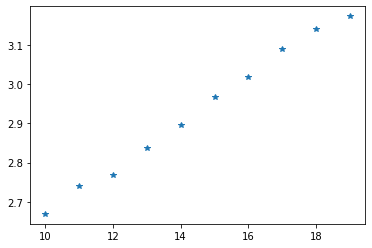

In [112]:
plt.plot(x,y,'*')

In [113]:
from scipy import stats
import numpy as np
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [114]:
slope

0.05795224242424245

In [115]:
intercept


2.0895804848484842

In [116]:
yy=[slope*u+intercept for u in x]

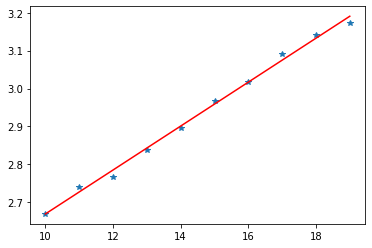

In [117]:
plt.plot(x,y,'*',x,yy,'r-')

# jeux de Lido simple:  un seul pion

**Objectif 1 : Simuler le jeux**

LA foction sim simule le jeux elle prend comme variable le nombre de pas  s  nécessaire pour atteindre la cible
avec A est la position du pion et NA  et le nombre de coup effecutués :

   1. la premiere boucle while :
le pion sort de sa prison (A=1) seulement lorsque la valeur du dé est égale a 6 
   2. la deuxieme boucle while :
tant que la position du pion est inférieure au nombre de pas nécessaires, on relance le dé et incrémente le nombre de coup   effectués : si la somme de la valeur de A + la valeur c du dé est inférieure a S le pion avance c pas , sinon si la somme est egale a S le pion arrive a sa position cible


**Objectif 2 : Calculer une estimation de l'éspérance mathématique de  𝑋𝑛  en utilisant python**

la simulation retourne l'esperance du scenario de 10^5 et donne le nuage de points de la moyenne dans un intervale [10,20]


**Objéctif 3 : Observer la variation de  𝔼(𝑋𝑛)  en fonction de  𝑛**

d'apres la simulation mathematique on trouve que le résultat est une droite d'équation y=ax+b